# Concevez une application au service de la santé publique
   

### Scénario 
    - Openclassrooms pour le projet 3 du parcrous Data Scientist
    - L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

## Énoncé
    Votre mission
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.
Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
Nettoyant les données en :
mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
Automatisant ces traitements pour éviter de répéter ces opérations
Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

## Idée d'application

Le nutri score se base exclusiement sur des indices caloriques, un article comme du beurre et de l'huile d'olive non néfaste à la santé en dose adaptée obtiendra un mauvais score. Nous observons ici la limite du nutri score tel qu'il a été construit. Nous souhaitons pour notre part créer un indice 'ultra transformé'pour le marché français.
Partant du constat qu'un aliment peu être plus calorique et peu transformé ou avoir le même niveau de proteine/lipide/glucide mais des conservateurs en plus grand nombres.

# Partie Exploratoire *non cleané*

#### Librairie

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

#### Importation 

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv',header=0, sep= '\t')

C:\Users\arthk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Notre tableau

In [3]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Notre fichier contient',data.shape[0],'lignes et',data.shape[1],'colonnes')

Notre fichier contient 320772 lignes et 162 colonnes


#### Valeur manquante ?

In [5]:
data.isna().mean().sort_values(ascending=False).head(40)

water-hardness_100g                      1.000000
nervonic-acid_100g                       1.000000
no_nutriments                            1.000000
ingredients_from_palm_oil                1.000000
ingredients_that_may_be_from_palm_oil    1.000000
nutrition_grade_uk                       1.000000
butyric-acid_100g                        1.000000
caproic-acid_100g                        1.000000
lignoceric-acid_100g                     1.000000
cerotic-acid_100g                        1.000000
glycemic-index_100g                      1.000000
elaidic-acid_100g                        1.000000
mead-acid_100g                           1.000000
erucic-acid_100g                         1.000000
melissic-acid_100g                       1.000000
chlorophyl_100g                          1.000000
palmitic-acid_100g                       0.999997
montanic-acid_100g                       0.999997
caprylic-acid_100g                       0.999997
stearic-acid_100g                        0.999997


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


#### Ensemble des colonnes
    Il nous faut avoir un visuel de nos variables, ces dernières sont nombreuses

In [7]:
pd.set_option('display.max_rows', 500) # Modifier l'affichage par défault
data.columns.to_frame()

,0
code,code
url,url
creator,creator
created_t,created_t
created_datetime,created_datetime
last_modified_t,last_modified_t
last_modified_datetime,last_modified_datetime
product_name,product_name
generic_name,generic_name
quantity,quantity


In [8]:
data.countries_fr.count()

320492

> Combien de produit ?

In [9]:
print('Nombre de produits dans notre catalogue:',data.product_name.nunique())

Nombre de produits dans notre catalogue: 221347


> Combien de pays ?

In [10]:
print('Nombre de pays:',data.countries.nunique())

Nombre de pays: 1434


#### Regardons les pays 
    Ils peuvent nous permettrent de filtrer notre tableau.
    Tous les pays ont-ils le même taux de produits ?

In [11]:
data.groupby('countries')['product_name'].count().sort_values(ascending=False).head(20)

countries
US                169800
France             75990
en:FR              11324
Suisse              9185
Deutschland         5827
España              3670
United Kingdom      2949
United States       2101
en:CH               1558
Australia           1392
Россия              1063
en:BE                947
Belgique             765
en:GB                614
en:DE                601
en:US                553
en:ES                529
France, Suisse       499
Portugal             487
en:IT                450
Name: product_name, dtype: int64

In [12]:
data.groupby('countries_fr')['product_name'].count().sort_values(ascending=False).head(20)

countries_fr
États-Unis            172506
France                 87398
Suisse                 11189
Allemagne               6824
Espagne                 4541
Royaume-Uni             3598
Belgique                1928
Australie               1617
Russie                  1213
France,Suisse           1198
Italie                   949
Canada                   716
Portugal                 554
Belgique,France          505
Pays-Bas                 495
France,Royaume-Uni       405
Brésil                   319
République tchèque       260
Autriche                 241
France,Allemagne         234
Name: product_name, dtype: int64

en:FR == France ? ou Francophonie ?
Les pays sont nommées plusieurs fois : US,en:US,United States .........

#### Vérifions 

In [13]:
data.loc[data['countries']=='en:FR']['product_name']

0                 Farine de blé noir
48                               NaN
194            Côte du Rhône village
224                     Bonbon Vichy
225              M&m's peanut butter
                     ...            
320747                           NaN
320755                           NaN
320760                      Poireaux
320764    Cheese cake thé vert, yuzu
320770      Tomates aux Vermicelles 
Name: product_name, Length: 16979, dtype: object

> Côte du Rhône village est un bon indicateur pour des produits bels et biens français

In [14]:
data.loc[data['countries']=='en:US']['product_name']

715              Ravioli Crab & lobster
1151                                NaN
1249                                NaN
1337      Hazelnut Spread + Breadsticks
1641              Sugar free hard candy
                      ...              
319990                  Body brilliance
320176                     the chia pod
320491             lucky habanero salsa
320651                              NaN
320744                   Ferrero Rocher
Name: product_name, Length: 761, dtype: object

#### STR

In [15]:
data[data['countries'].str.contains('fr') | (data['countries'].str.lower().str.contains('en:france'))]['countries'].unique()

array(['en:AU, en:france', 'États-Unis, en:france, US',
       'en:RE, en:france', 'United States, en:france',
       'Deutschland, en:france', 'en:US, en:france',
       'United Kingdom, en:france', 'Belgique, en:france',
       'United States, en:france, en:switzerland', 'en:CA, en:france',
       'Canada, en:france', 'Canada, en:france, en:switzerland',
       'fr:Québec', 'en:france', 'en:DE, en:france', 'en:IT, en:france',
       'en:QA, en:france', 'Polynésie française', 'الجزائر, en:france',
       'Tunisie, en:france', 'Suisse,Belgique, en:france',
       'Saint Pierre and Miquelon, en:france, en:belgium',
       'en:AN, en:france', 'South Africa', 'Algérie, en:france',
       'India, en:france', 'Suisse, en:france', 'en:BE, en:france',
       '日本, en:france', 'fr:Pologne', 'Sénégal, en:france',
       'Luxembourg, en:france', 'Royaume-Uni,france',
       'Belgium, en:france', 'España, en:france', 'Germany, en:france',
       'United Kingdom,Scotland, en:france', 'Germany,Spain

In [16]:
data[data['countries_fr'].str.contains('fr') | (data['countries_fr'].str.lower().str.contains('france'))]['countries_fr'].unique()

array(['France', 'France,États-Unis', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Australie,France',
       'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'France,La Réunion',
       'France,Allemagne', 'Belgique,France', 'France,Suisse',
       'Polynésie française', 'Polynésie française,États-Unis',
       'France,Suisse,États-Unis', 'France,Italie',
       'France,Royaume-Uni,États-Unis', 'Australie,France,Royaume-Uni',
       'Canada,France', 'Canada,France,Suisse',
       'Belgique,Canada,France,Suisse', 'France,Saint-Pierre-et-Miquelon',
       'France,Russie,Espagne,Royaume-Uni', 'France,Suisse,Royaume-Uni',
       'France,Nouvelle-Zélande', 'Belgique,France,Royaume-Uni',
       'Canada,France,États-Unis', 'France,Pays-Bas',
       'France,Pays-Bas,Royaume-Uni', 'France,Qatar', 'Algérie,France',
       'France,Guyane', 'Belgique,France,Pays-Bas', 'France,Tunisie',
       'Belgique,France,Suisse',
       'Belgique,France,Sai

In [17]:
data.loc[data['countries']=='en:france']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
67882,66188101700,http://world-fr.openfoodfacts.org/produit/0066...,boljo,1332803379,2012-03-26T23:09:39Z,1480084954,2016-11-25T14:42:34Z,Oréo,Préparation pour gâteau,363 g,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
194974,3124480000378,http://world-fr.openfoodfacts.org/produit/3124...,malikele,1340039651,2012-06-18T17:14:11Z,1480085089,2016-11-25T14:44:49Z,Ginger ale,Boisson gazeuse rafraîchissante aux extraits v...,"1,5 l",...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,NaN,NaN
197216,3175681037946,http://world-fr.openfoodfacts.org/produit/3175...,claudymam28,1396445751,2014-04-02T13:35:51Z,1412941454,2014-10-10T11:44:14Z,"ravioli tofu, tomates,basilic",ravioli,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
277606,5410041435900,http://world-fr.openfoodfacts.org/produit/5410...,openfoodfacts-contributors,1418554544,2014-12-14T10:55:44Z,1480084421,2016-11-25T14:33:41Z,TUC Paprika,NaN,100g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299115,7622300590635,http://world-fr.openfoodfacts.org/produit/7622...,carounette,1424683109,2015-02-23T09:18:29Z,1480084437,2016-11-25T14:33:57Z,max cappuccino,Préparation instantanée pour cappuccino au caf...,335g,...,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,NaN,NaN


####  On sait que : countries : list of countries where the product is sold
    Soit la variable countries regroupe des produits par pays.
    
    Question: Est ce que les produits 'France' regroupe l'ensemble des produits vendus en France ?

In [18]:
en_fr = data.loc[data['countries']=='en:FR']
fr= data.loc[data['countries']=='France']
en_fr2 = data.loc[data['countries']=='en:france']

> On regarde si les produits de fr sont inclus dans en_fr et en_fr2

In [19]:
print(en_fr.shape[0],fr.shape[0],en_fr2.shape[0])

16979 77292 5


In [20]:
fr[['product_name']].isin(en_fr[['product_name']]).value_counts()

product_name
False           77292
dtype: int64

In [21]:
fr[['product_name']].isin(en_fr2[['product_name']]).value_counts()

product_name
False           77292
dtype: int64

In [22]:
en_fr2[['product_name']].isin(en_fr[['product_name']]).value_counts()

product_name
False           5
dtype: int64

> Nos produits sont différents

## On sélectionne la France

In [23]:
cocorico = ['en:FR','France','en:france']
data_fr = data.loc[data['countries'].isin(cocorico)]
data_fr.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_fr.shape

(94276, 162)

In [25]:
data_fr.pnns_groups_1.value_counts()

unknown                    11854
Sugary snacks               8710
Fish Meat Eggs              6649
Beverages                   6142
Milk and dairy products     6084
Composite foods             5879
Cereals and potatoes        5700
Fruits and vegetables       3946
Fat and sauces              3602
Salty snacks                1993
fruits-and-vegetables        536
sugary-snacks                453
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [26]:
data_fr.pnns_groups_2.value_counts()

unknown                             11854
One-dish meals                       4813
Biscuits and cakes                   3528
Sweets                               3213
Cereals                              2884
Cheese                               2870
Processed meat                       2853
Non-sugared beverages                2691
Dressings and sauces                 2451
Fish and seafood                     2136
Chocolate products                   1969
Milk and yogurt                      1951
Alcoholic beverages                  1933
Vegetables                           1728
Appetizers                           1523
Sweetened beverages                  1486
Fruit juices                         1481
Fruits                               1445
Meat                                 1341
Bread                                1227
Fats                                 1151
Breakfast cereals                     964
Dairy desserts                        718
Sandwich                          

In [27]:
x =  data_fr.isna().mean().sort_values(ascending=False)
x

water-hardness_100g                           1.000000
nervonic-acid_100g                            1.000000
mead-acid_100g                                1.000000
gondoic-acid_100g                             1.000000
elaidic-acid_100g                             1.000000
dihomo-gamma-linolenic-acid_100g              1.000000
glycemic-index_100g                           1.000000
cerotic-acid_100g                             1.000000
lignoceric-acid_100g                          1.000000
behenic-acid_100g                             1.000000
stearic-acid_100g                             1.000000
palmitic-acid_100g                            1.000000
myristic-acid_100g                            1.000000
capric-acid_100g                              1.000000
caprylic-acid_100g                            1.000000
caproic-acid_100g                             1.000000
butyric-acid_100g                             1.000000
nutrition_grade_uk                            1.000000
ingredient

In [28]:
data_fr_2 = data_fr.loc[:,x.index[x<0.6]]
data_fr_2.shape

(94276, 46)

In [29]:
data_fr_2.isna().mean().sort_values()

code                                       0.000000
last_modified_t                            0.000000
url                                        0.000000
creator                                    0.000000
created_t                                  0.000000
created_datetime                           0.000000
countries_fr                               0.000000
last_modified_datetime                     0.000000
states_fr                                  0.000000
countries_tags                             0.000000
states                                     0.000000
countries                                  0.000000
states_tags                                0.000000
product_name                               0.073794
brands                                     0.125493
brands_tags                                0.125536
quantity                                   0.282394
pnns_groups_2                              0.325937
pnns_groups_1                              0.347130
energy_100g 

faire miss No 

In [30]:
data_fr_2.describe()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
count,43612.000000,44123.000000,44535.000000,50423.000000,50423.000000,50423.000000,58447.000000,58447.000000,59336.000000,59434.000000,59487.000000,59490.000000,61128.000000,6.137800e+04
mean,2.522059,27.290390,13.276095,0.068025,1.858041,0.148484,8.291803,8.601314,5.386168,13.234637,0.456858,1.160365,7.794673,1.167946e+03
std,4.634874,27.303062,16.987390,0.255621,2.569088,0.452348,9.353847,9.018754,8.540045,19.028968,1.686134,4.282832,7.932106,1.316651e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,3.900000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.300000,1.000000,0.031496,0.080000,1.800000,4.270000e+02
50%,1.300000,14.000000,6.800000,0.000000,1.000000,0.000000,7.000000,8.000000,1.900000,4.000000,0.224409,0.570000,6.000000,1.027000e+03
75%,3.200000,52.600000,21.000000,0.000000,3.000000,0.000000,16.000000,15.000000,7.300000,17.000000,0.492126,1.250000,11.000000,1.639000e+03
max,178.000000,190.000000,380.000000,2.000000,31.000000,5.000000,36.000000,40.000000,210.000000,105.000000,83.000000,211.000000,100.000000,3.251373e+06


In [31]:
liste = data_fr_2.columns[(data_fr_2.columns.str.contains('_100g')) & ~(data_fr_2.columns.str.contains('nutrition|energy'))]
liste

Index(['fiber_100g', 'carbohydrates_100g', 'fat_100g', 'saturated-fat_100g',
       'sugars_100g', 'sodium_100g', 'salt_100g', 'proteins_100g'],
      dtype='object')

## Imputation 1
    Nous avons des valeurs aberrantes:
    Des produits pour 100g supérieur à 100: Nous les imputons par Nan
    Des valeurs négatives: Nous les imputons par 0.

In [32]:
for col in liste:
    data_fr_2[col] = np.where(data_fr_2[col]>100,np.nan,data_fr_2[col])
    data_fr_2[col] = np.where(data_fr_2[col]<0,0,data_fr_2[col])
    

In [33]:
data_fr_2.describe()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
count,43611.000000,44115.000000,44533.000000,50423.000000,50423.000000,50423.000000,58447.000000,58447.000000,59335.000000,59430.000000,59487.000000,59488.000000,61128.000000,6.137800e+04
mean,2.518036,27.272392,13.265800,0.068025,1.858041,0.148484,8.291803,8.601314,5.382719,13.228575,0.456858,1.154756,7.794673,1.167946e+03
std,4.558119,27.269406,16.893056,0.255621,2.569088,0.452348,9.353847,9.018754,8.498704,19.015243,1.686134,4.164760,7.932106,1.316651e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,3.900000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.300000,1.000000,0.031496,0.080000,1.800000,4.270000e+02
50%,1.300000,14.000000,6.800000,0.000000,1.000000,0.000000,7.000000,8.000000,1.900000,4.000000,0.224409,0.570000,6.000000,1.027000e+03
75%,3.200000,52.600000,21.000000,0.000000,3.000000,0.000000,16.000000,15.000000,7.300000,17.000000,0.492126,1.250000,11.000000,1.639000e+03
max,100.000000,100.000000,100.000000,2.000000,31.000000,5.000000,36.000000,40.000000,100.000000,100.000000,83.000000,100.000000,100.000000,3.251373e+06


### Bivarié

<Figure size 432x648 with 0 Axes>

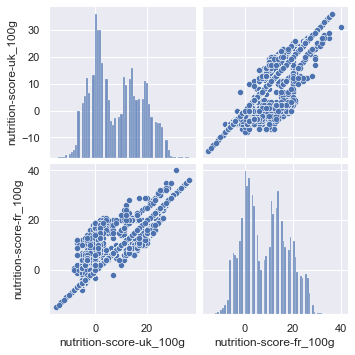

In [34]:
plt.figure(figsize=(6,9))
sns.pairplot(data_fr_2, vars=['nutrition-score-uk_100g', 'nutrition-score-fr_100g'])
#plt.figure(figsize=(9,9))
plt.show()

In [35]:
#pip install missingno

<AxesSubplot:>

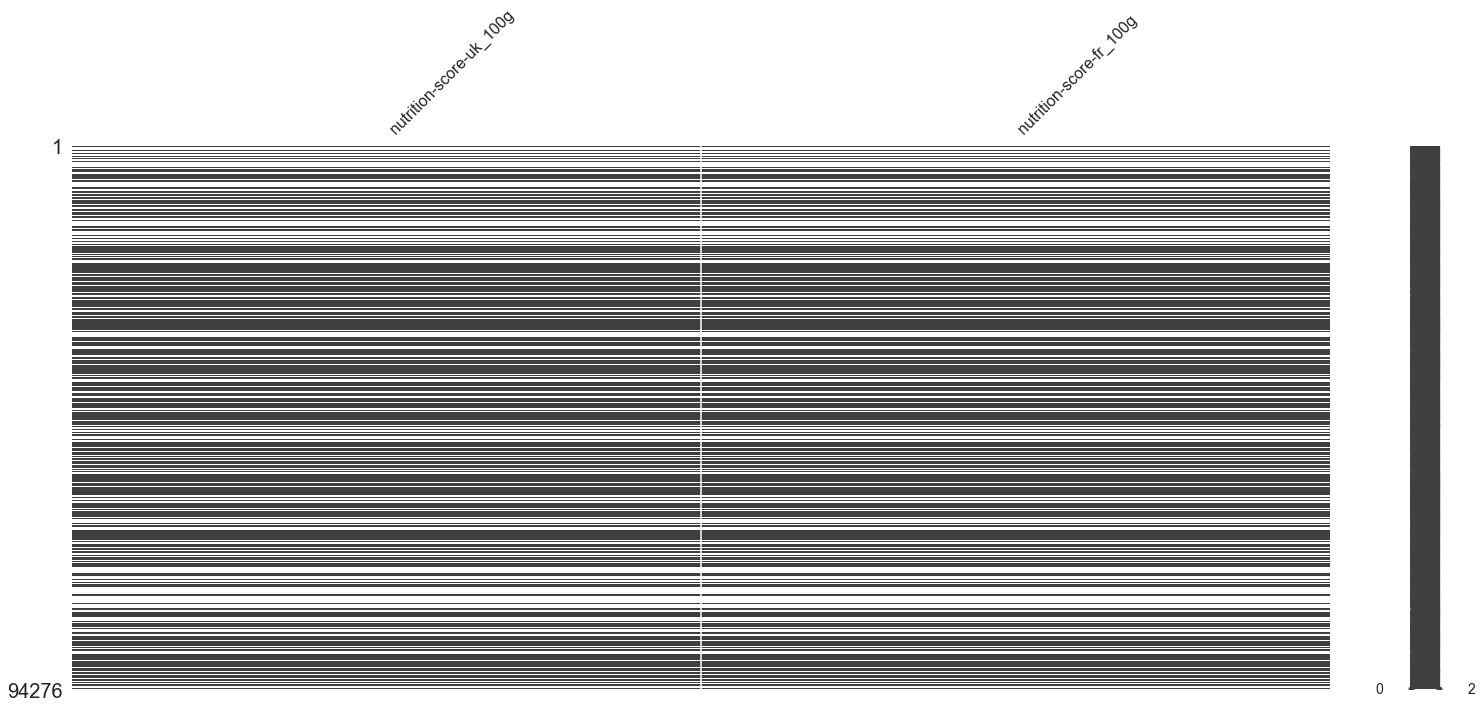

In [36]:
import missingno as msno
%matplotlib inline
msno.matrix(data_fr_2[['nutrition-score-uk_100g', 'nutrition-score-fr_100g']])

<AxesSubplot:>

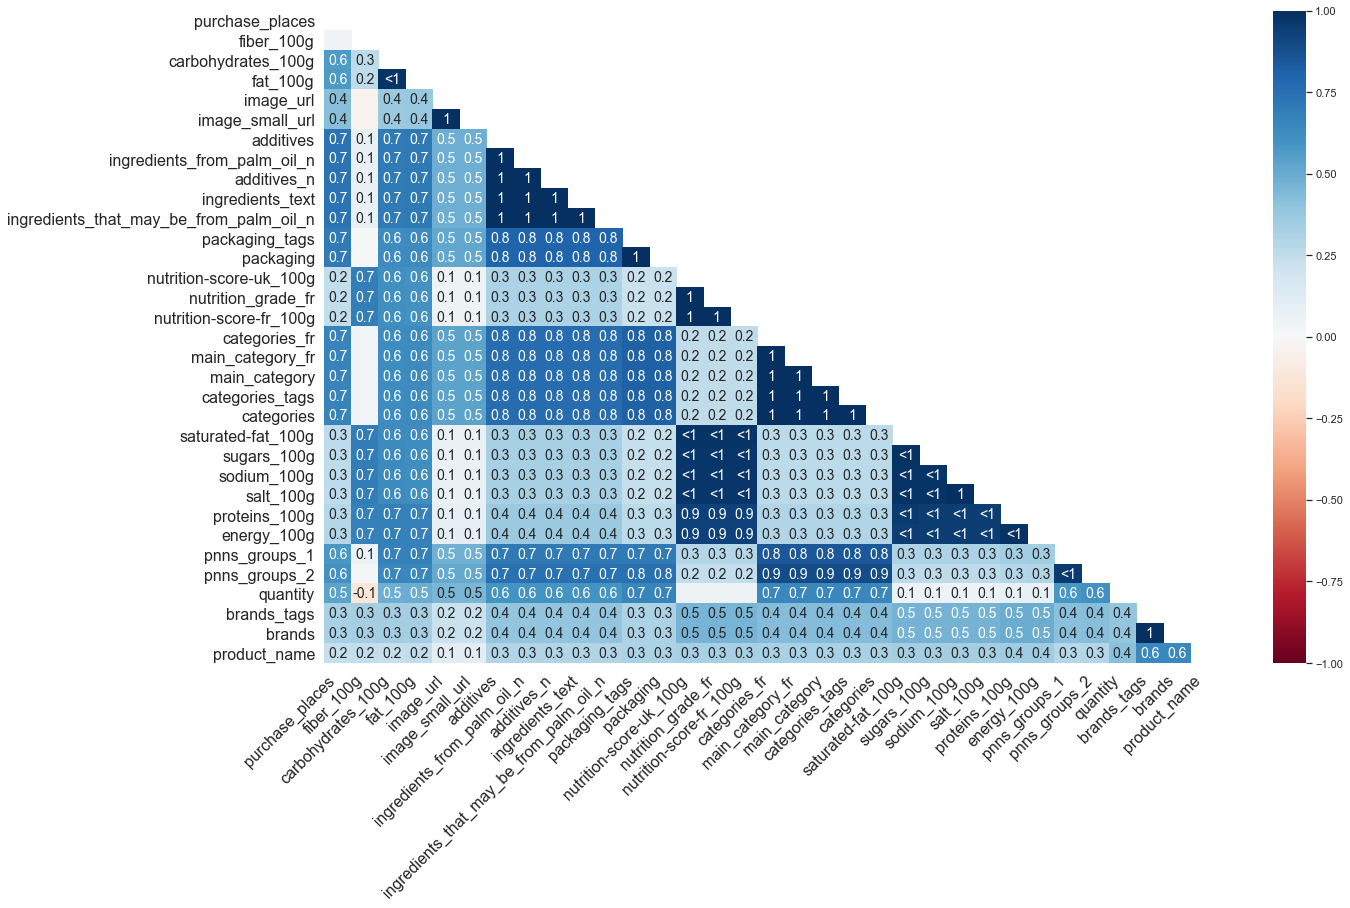

In [37]:
msno.heatmap(data_fr_2)

<AxesSubplot:>

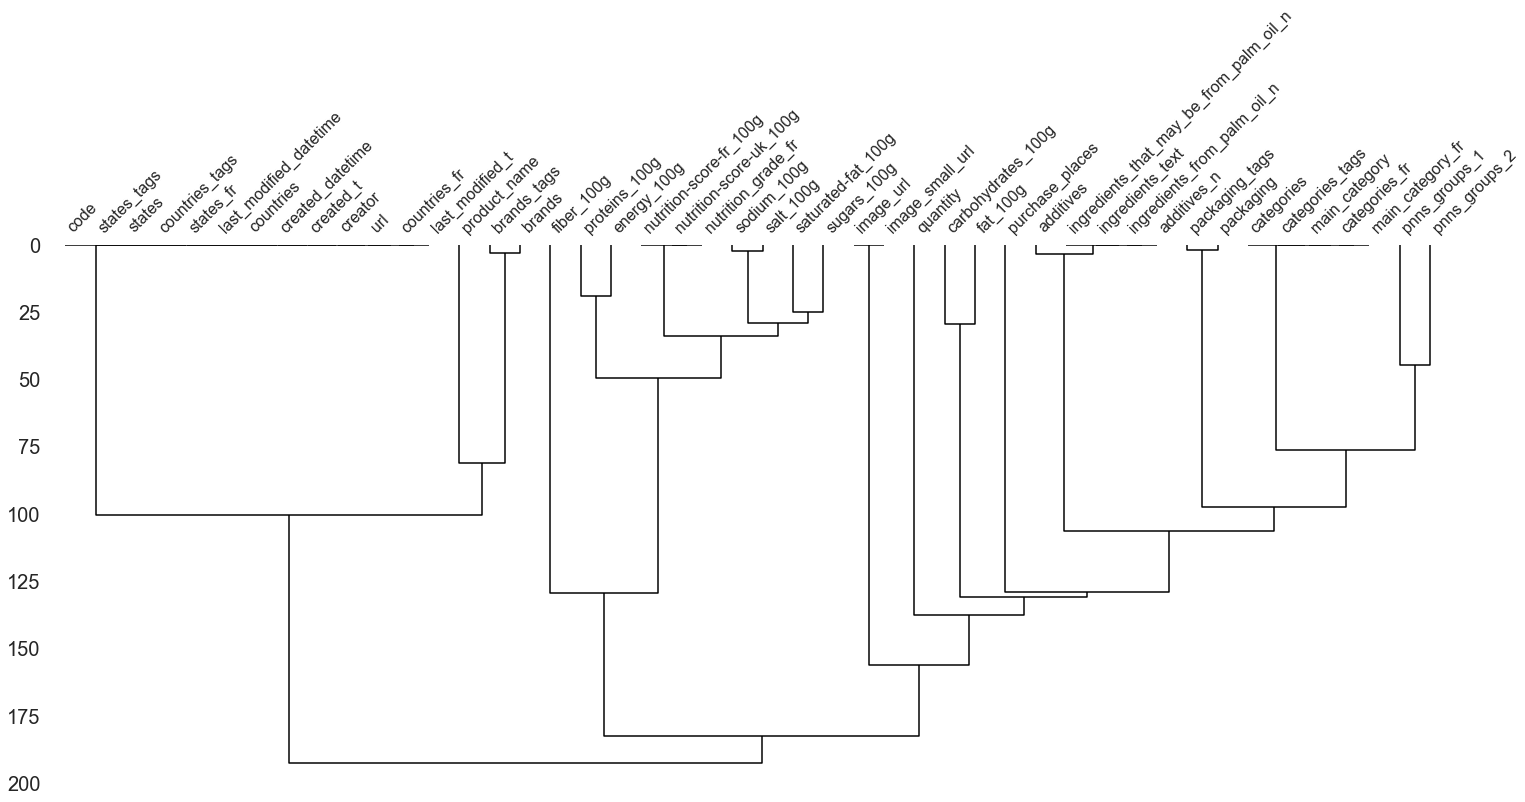

In [38]:
msno.dendrogram(data_fr_2)

> On peut voir que nutrition-score-uk_100g & nutrition-score-fr_100g sont similaire.
On peut supprimer la version uk.

#### Suppression de nutrition-score-uk_100g

In [39]:
data_fr_2.drop(columns = 'nutrition-score-uk_100g', inplace = True)

## Données numériques 

In [40]:
data_fr_2.select_dtypes(include=['float64']).isna().mean()

fiber_100g                                 0.537411
carbohydrates_100g                         0.532065
fat_100g                                   0.527632
ingredients_from_palm_oil_n                0.465156
additives_n                                0.465156
ingredients_that_may_be_from_palm_oil_n    0.465156
nutrition-score-fr_100g                    0.380044
saturated-fat_100g                         0.370625
sugars_100g                                0.369617
sodium_100g                                0.369012
salt_100g                                  0.369002
proteins_100g                              0.351606
energy_100g                                0.348954
dtype: float64

In [41]:
df1 = data_fr_2.copy()
df1 = df1.select_dtypes(include=['float64'])

<AxesSubplot:>

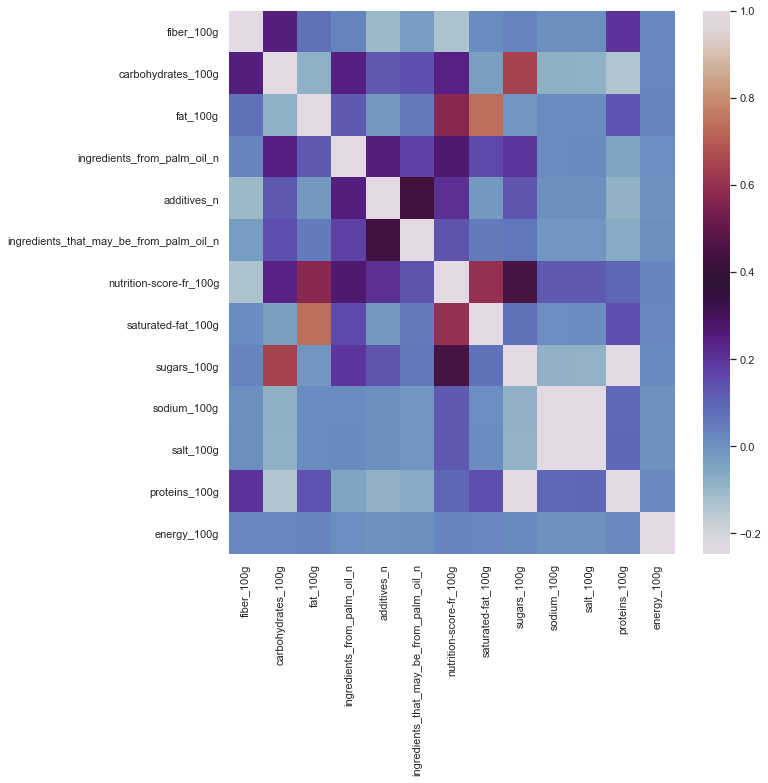

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),cmap = 'twilight')

### Nettoyage variable
    pnns_groups_2
    countries
 

In [43]:
data_fr_2.countries = 'France'
data_fr_2.countries

0         France
46        France
48        France
136       France
182       France
           ...  
320761    France
320763    France
320764    France
320765    France
320770    France
Name: countries, Length: 94276, dtype: object

In [44]:
data_fr_2.countries_tags.unique()

array(['en:france', 'france'], dtype=object)

In [45]:
data_fr_2.drop(columns = 'countries_tags', inplace = True)

### Présence de doublons : 
    Legumes,legumes,Vegetables,vegetables

In [46]:
data_fr_2.pnns_groups_2.value_counts().shape

(41,)

In [47]:
data_fr_2.pnns_groups_2.str.lower().value_counts().shape # Mise ne minuscule des variables : suppression de 4 doublons

(37,)

In [48]:
data_fr_2.pnns_groups_2 = data_fr_2.pnns_groups_2.str.lower() # On applique la transformation

In [49]:
data_fr_2.pnns_groups_2.value_counts() # inconnu == unkown , vegetables = legumes

unknown                             11854
one-dish meals                       4813
biscuits and cakes                   3528
sweets                               3213
cereals                              2885
cheese                               2870
processed meat                       2853
non-sugared beverages                2691
dressings and sauces                 2451
vegetables                           2240
fish and seafood                     2136
chocolate products                   1969
milk and yogurt                      1951
alcoholic beverages                  1933
appetizers                           1523
sweetened beverages                  1486
fruit juices                         1481
fruits                               1469
meat                                 1341
bread                                1227
fats                                 1151
breakfast cereals                     964
dairy desserts                        718
sandwich                          

In [50]:
data_fr_2['pnns_groups_2'] = data_fr_2['pnns_groups_2'].replace(
    to_replace=['inconnu', 'legumes'], 
    value =['unknown','vegetables'])


In [51]:
data_fr_2.pnns_groups_2.value_counts().shape

(36,)

In [52]:
data_fr_2.loc[data_fr_2['pnns_groups_2']=='unknown'].isna().mean()

purchase_places                            0.593724
fiber_100g                                 0.574574
carbohydrates_100g                         0.458579
fat_100g                                   0.456470
image_url                                  0.453433
image_small_url                            0.453433
additives                                  0.420702
ingredients_from_palm_oil_n                0.420280
additives_n                                0.420280
ingredients_text                           0.420280
ingredients_that_may_be_from_palm_oil_n    0.420280
packaging_tags                             0.425679
packaging                                  0.425763
nutrition_grade_fr                         0.422389
nutrition-score-fr_100g                    0.422389
categories_fr                              0.410326
main_category_fr                           0.410326
main_category                              0.410326
categories_tags                            0.410326
categories  

#### NEW

In [53]:
df1 = data_fr_2.copy()
df1 = df1.select_dtypes(include=['float64'])

In [54]:
df1.columns

Index(['fiber_100g', 'carbohydrates_100g', 'fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g',
       'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
       'proteins_100g', 'energy_100g'],
      dtype='object')

In [55]:
#sns.pairplot(df1)

In [56]:
df1.isna().mean()

fiber_100g                                 0.537411
carbohydrates_100g                         0.532065
fat_100g                                   0.527632
ingredients_from_palm_oil_n                0.465156
additives_n                                0.465156
ingredients_that_may_be_from_palm_oil_n    0.465156
nutrition-score-fr_100g                    0.380044
saturated-fat_100g                         0.370625
sugars_100g                                0.369617
sodium_100g                                0.369012
salt_100g                                  0.369002
proteins_100g                              0.351606
energy_100g                                0.348954
dtype: float64

In [57]:
df1.energy_100g.mode()

0    0.0
dtype: float64

In [58]:
data_fr_2.pnns_groups_2.value_counts()

unknown                             11854
one-dish meals                       4813
biscuits and cakes                   3528
sweets                               3213
cereals                              2885
cheese                               2870
processed meat                       2853
vegetables                           2765
non-sugared beverages                2691
dressings and sauces                 2451
fish and seafood                     2136
chocolate products                   1969
milk and yogurt                      1951
alcoholic beverages                  1933
appetizers                           1523
sweetened beverages                  1486
fruit juices                         1481
fruits                               1469
meat                                 1341
bread                                1227
fats                                 1151
breakfast cereals                     964
dairy desserts                        718
sandwich                          

In [59]:
data_fr_2.groupby('pnns_groups_2')['energy_100g'].median().sort_values()

pnns_groups_2
artificially sweetened beverages      14.0
non-sugared beverages                138.0
soups                                154.0
vegetables                           157.0
alcoholic beverages                  176.0
sweetened beverages                  179.0
fruit juices                         197.0
fruit nectars                        199.0
fruits                               275.0
potatoes                             360.0
milk and yogurt                      370.0
meat                                 563.0
one-dish meals                       564.0
dairy desserts                       573.0
eggs                                 602.0
dressings and sauces                 635.5
tripe dishes                         711.5
fish and seafood                     747.0
ice cream                            882.0
pizza pies and quiche                977.0
sandwich                            1025.0
processed meat                      1030.0
unknown                             1079

# Imputation 2 : par la mediane
        Le mode de energy_100g = 0, on impute cette valeure aberrante par la mediane
    

In [60]:
df1.energy_100g.describe()

count    6.137800e+04
mean     1.167946e+03
std      1.316651e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.027000e+03
75%      1.639000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [61]:
df1.energy_100g.mode()

0    0.0
dtype: float64

In [62]:
data_fr_2['energy_100g'] = np.where(data_fr_2['energy_100g']==0,np.nan,data_fr_2['energy_100g'])

In [63]:
data_fr_2.pnns_groups_2.isna().sum() # On vérifie

30728

In [64]:
data_fr_2.pnns_groups_2 = data_fr_2.pnns_groups_2.fillna('inconnu')

In [65]:
data_fr_2['energy_100g'] = data_fr_2[['energy_100g','pnns_groups_2']].groupby('pnns_groups_2',dropna=False).transform(lambda x:x.fillna(x.median()))

In [66]:
data_fr_2['energy_100g'].isna().sum() # On vérifie

0

# Imputation 3 : KNN
    On impute le reste des variables numériques par KNN

In [67]:
from sklearn.impute import KNNImputer

In [68]:
df_knn =  data_fr_2.select_dtypes(include=['float64'])
df_knn.head()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163.0
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095.0
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163.0
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095.0
182,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,157.0


In [69]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
array_impute = imputer.fit_transform(df_knn)
#array_impute

In [70]:
column_names = df_knn.columns
df_impute = pd.DataFrame(array_impute, index= data_fr_2.index , columns=column_names) # Transformation en df 
df_impute

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,0.000,0.666667,8.166667,0.0,2.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1163.0
46,0.000,28.000000,10.833333,0.0,3.333333,0.000000,0.000000,4.500000,0.400000,1.574803,4.000000,12.733333,1095.0
48,0.000,0.666667,8.166667,0.0,2.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1163.0
136,0.000,28.000000,10.833333,0.0,3.333333,0.000000,0.000000,4.500000,0.400000,1.574803,4.000000,12.733333,1095.0
182,6.600,3.000000,1.200000,0.0,0.000000,0.000000,-3.333333,0.433333,1.366667,0.106207,0.269767,2.433333,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,0.000,7.766667,10.800000,0.0,0.666667,0.000000,3.666667,0.236667,5.400000,0.101050,0.256667,2.000000,176.0
320763,0.200,0.500000,0.200000,0.0,0.000000,0.000000,2.000000,0.200000,0.500000,0.010000,0.025400,0.500000,21.0
320764,0.000,0.666667,8.166667,0.0,2.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1163.0
320765,1.349,33.966667,8.106667,0.0,0.000000,0.000000,11.666667,3.573333,19.296667,0.299333,0.760000,4.844333,1030.0


> On arrondi les entiers à l'unité (ex additives_n) et les valeurs décimales(ex fat_100g) à la première décimale

In [71]:
_ = df_impute.columns.str.endswith('n')
_ = df_impute.columns[_]
round(df_impute[_],0).head(5)

,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n
0,0.0,3.0,0.0
46,0.0,3.0,0.0
48,0.0,3.0,0.0
136,0.0,3.0,0.0
182,0.0,0.0,0.0


In [72]:
df_impute[_] = round(df_impute[_],0)

In [73]:
__ = df_impute.columns.str.endswith('g')
__ = df_impute.columns[__]
round(df_impute[__],1).head(5)

,fiber_100g,carbohydrates_100g,fat_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,0.0,0.7,8.2,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
46,0.0,28.0,10.8,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
48,0.0,0.7,8.2,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
136,0.0,28.0,10.8,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
182,6.6,3.0,1.2,-3.3,0.4,1.4,0.1,0.3,2.4,157.0


In [74]:
df_impute[__] = round(df_impute[__],1)

In [75]:
df_impute

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
46,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
48,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
136,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
182,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,0.0,7.8,10.8,0.0,1.0,0.0,3.7,0.2,5.4,0.1,0.3,2.0,176.0
320763,0.2,0.5,0.2,0.0,0.0,0.0,2.0,0.2,0.5,0.0,0.0,0.5,21.0
320764,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
320765,1.3,34.0,8.1,0.0,0.0,0.0,11.7,3.6,19.3,0.3,0.8,4.8,1030.0


In [76]:
df_impute.describe()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
count,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,94276.000000,9.427600e+04
mean,1.566397,21.806225,11.982261,0.048135,2.126639,0.115194,6.227263,4.103830,10.115572,0.408316,1.038849,6.212094,1.118134e+03
std,3.470838,25.672735,14.611808,0.216664,2.182438,0.384767,8.364756,7.451254,16.951222,1.411518,3.508621,7.299524,1.062711e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-01
25%,0.000000,0.700000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,5.160000e+02
50%,0.200000,10.000000,8.200000,0.000000,2.000000,0.000000,3.000000,1.000000,2.100000,0.100000,0.300000,4.200000,1.163000e+03
75%,2.000000,37.900000,14.800000,0.000000,3.000000,0.000000,13.000000,4.500000,12.000000,0.400000,1.100000,9.600000,1.443000e+03
max,100.000000,100.000000,100.000000,2.000000,31.000000,5.000000,40.000000,100.000000,100.000000,83.000000,100.000000,100.000000,3.251373e+06


<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='pnns_groups_2'>

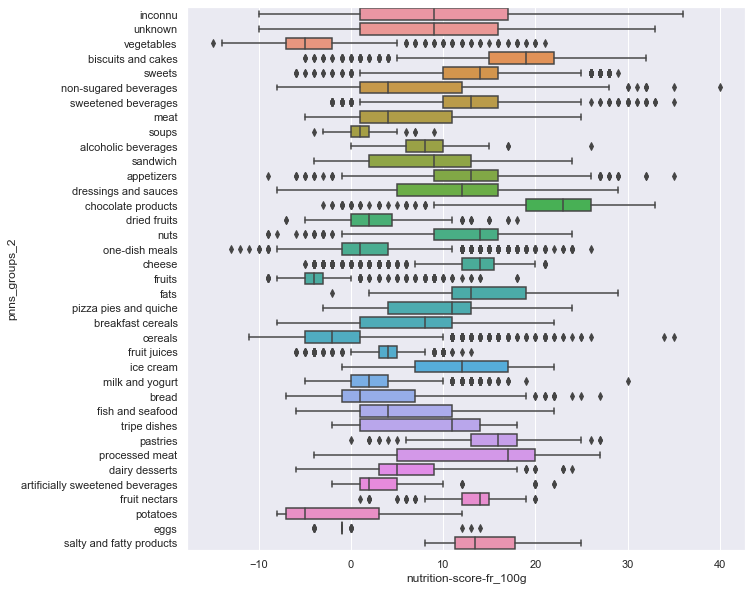

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_fr_2, y="pnns_groups_2", x="nutrition-score-fr_100g")

## Exportation CSV

In [78]:
df_impute.to_csv('P3_clean.csv',index=True)
data_fr_2.to_csv('data_fr_2.csv',index=True)